<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-11-23 22:15:52--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  54.2MB/s    in 3.7s    

2025-11-23 22:15:57 (54.9 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [ ]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [ ]:
QUERY = """
SELECT name as Table_Name
FROM sqlite_master
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [ ]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


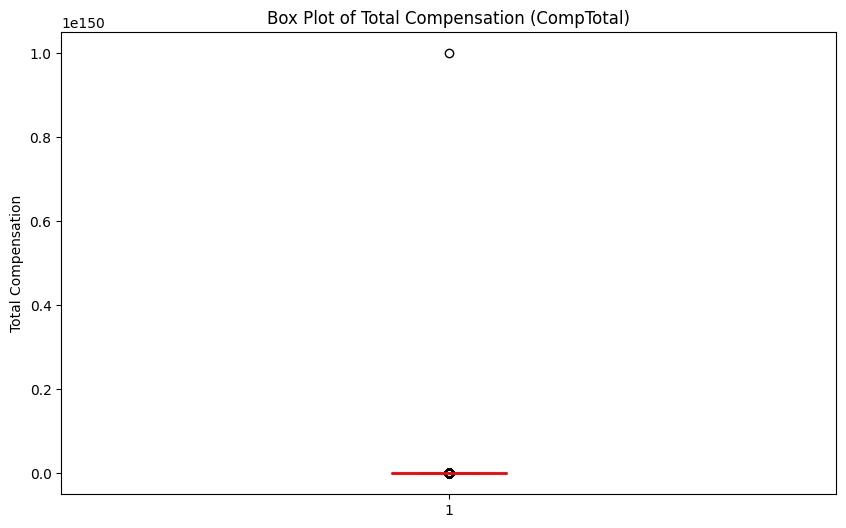

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ إنشاء الاتصال بقاعدة البيانات
conn = sqlite3.connect('survey-data.sqlite')

# 2️⃣ جلب عمود CompTotal من جدول main
df = pd.read_sql_query("SELECT CompTotal FROM main", conn)

# 3️⃣ تنظيف البيانات: تحويل النصوص إلى أرقام وحذف NaN
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
comp_clean = df['CompTotal'].dropna()

# 4️⃣ رسم Box Plot
plt.figure(figsize=(10,6))
plt.boxplot(comp_clean, vert=True, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='black'),
            medianprops=dict(color='red', linewidth=2),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'))

plt.title('Box Plot of Total Compensation (CompTotal)')
plt.ylabel('Total Compensation')
plt.show()

# 5️⃣ إغلاق الاتصال بعد الانتهاء
conn.close()


**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


In [ ]:
import sqlite3
import pandas as pd

# الاتصال بقاعدة البيانات
conn = sqlite3.connect('survey-data.sqlite')

# جلب العمود 'Age' من جدول 'main'
df = pd.read_sql_query("SELECT Age FROM main", conn)

print(df.value_counts())

# إغلاق الاتصال بعد الانتهاء
conn.close()


Age               
25-34 years old       23911
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Prefer not to say       322
Name: count, dtype: int64


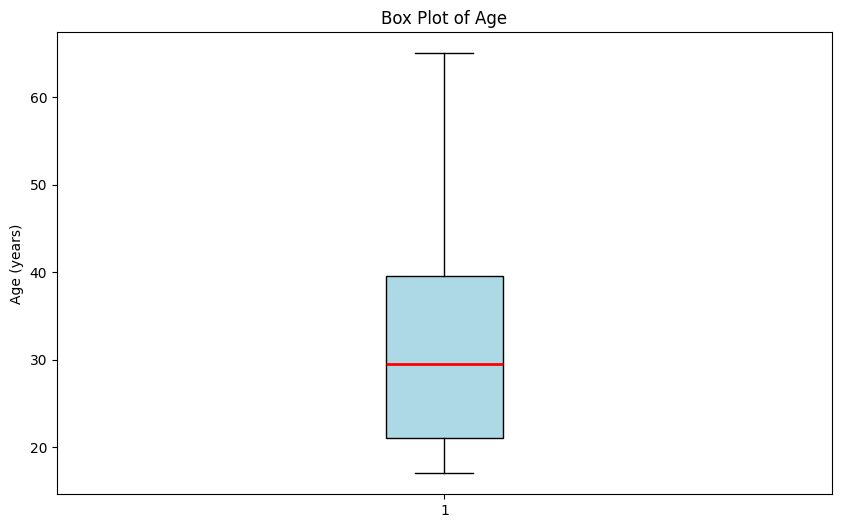

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ الاتصال بقاعدة البيانات
conn = sqlite3.connect('survey-data.sqlite')

# 2️⃣ جلب عمود Age من جدول main
df = pd.read_sql_query("SELECT Age FROM main", conn)

# 3️⃣ تحويل الفئات النصية إلى أرقام
age_map = {
    "Under 18 years old": 17,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 65
    # "Prefer not to say" يمكن تجاهلها
}

df['AgeNum'] = df['Age'].map(age_map)

# 4️⃣ إزالة القيم الفارغة
age_clean = df['AgeNum'].dropna()

# 5️⃣ رسم Box Plot
plt.figure(figsize=(10,6))
plt.boxplot(age_clean, vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            medianprops=dict(color='red', linewidth=2),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'))

plt.title('Box Plot of Age')
plt.ylabel('Age (years)')
plt.show()

# 6️⃣ إغلاق الاتصال
conn.close()


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


<Figure size 1200x700 with 0 Axes>

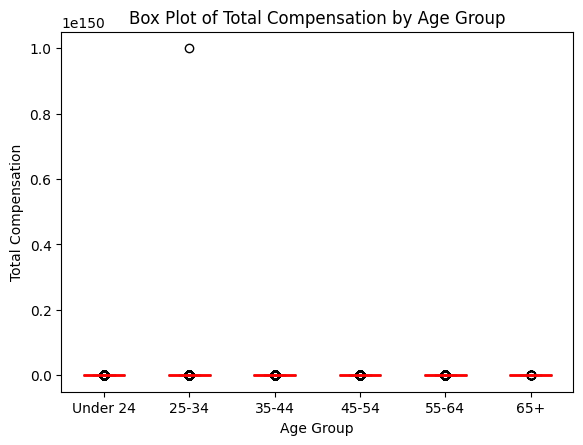

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ الاتصال بقاعدة البيانات
conn = sqlite3.connect('survey-data.sqlite')

# 2️⃣ جلب الأعمدة CompTotal و Age
df = pd.read_sql_query("SELECT CompTotal, Age FROM main", conn)

# 3️⃣ تنظيف CompTotal: تحويل النصوص إلى أرقام وحذف القيم الفارغة
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['CompTotal', 'Age'])

# 4️⃣ تحويل الفئات النصية للعمر إلى أرقام
age_map = {
    "Under 18 years old": 17,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 65
}

df['AgeNum'] = df['Age'].map(age_map)

# 5️⃣ تقسيم الأعمار إلى مجموعات مرتبة
age_bins = [0, 24, 34, 44, 54, 64, 100]
age_labels = ["Under 24", "25-34", "35-44", "45-54", "55-64", "65+"]
df['AgeGroup'] = pd.cut(df['AgeNum'], bins=age_bins, labels=age_labels)

# 6️⃣ رسم Box Plot لكل مجموعة عمرية
plt.figure(figsize=(12,7))
df.boxplot(column='CompTotal', by='AgeGroup', grid=False, patch_artist=True,
           boxprops=dict(facecolor='skyblue', color='black'),
           medianprops=dict(color='red', linewidth=2),
           whiskerprops=dict(color='black'),
           capprops=dict(color='black'))

plt.title('Box Plot of Total Compensation by Age Group')
plt.suptitle('')  # إزالة العنوان التلقائي
plt.xlabel('Age Group')
plt.ylabel('Total Compensation')
plt.show()

# 7️⃣ إغلاق الاتصال
conn.close()


### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


<Figure size 1200x700 with 0 Axes>

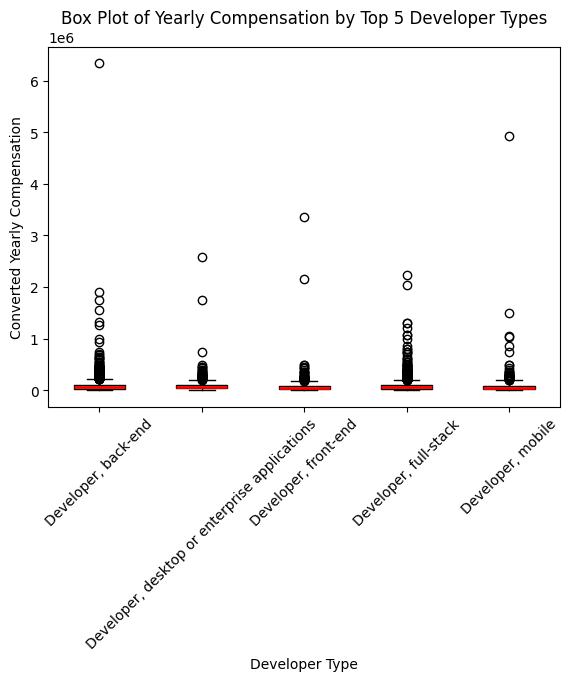

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ الاتصال بقاعدة البيانات
conn = sqlite3.connect('survey-data.sqlite')

# 2️⃣ جلب الأعمدة
df = pd.read_sql_query("SELECT ConvertedCompYearly, DevType FROM main", conn)

# 3️⃣ تنظيف العمود Comp
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

# إزالة الصفوف التي تحتوي NaN
df_clean = df.dropna(subset=['ConvertedCompYearly', 'DevType'])

# 4️⃣ إيجاد أفضل 5 أنواع مطورين حسب التكرار
top5_devtypes = df_clean['DevType'].value_counts().head(5).index.tolist()

# فلترة البيانات لتشمل فقط الأنواع الخمسة
df_top5 = df_clean[df_clean['DevType'].isin(top5_devtypes)]

# 5️⃣ رسم Box Plot لكل نوع مطور
plt.figure(figsize=(12,7))
df_top5.boxplot(column='ConvertedCompYearly', by='DevType', grid=False, patch_artist=True,
                boxprops=dict(facecolor='orange', color='black'),
                medianprops=dict(color='red', linewidth=2),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'))

plt.title('Box Plot of Yearly Compensation by Top 5 Developer Types')
plt.suptitle('')  # إزالة العنوان التلقائي
plt.xlabel('Developer Type')
plt.ylabel('Converted Yearly Compensation')
plt.xticks(rotation=45)
plt.show()

# 6️⃣ إغلاق الاتصال
conn.close()


**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


<Figure size 1200x700 with 0 Axes>

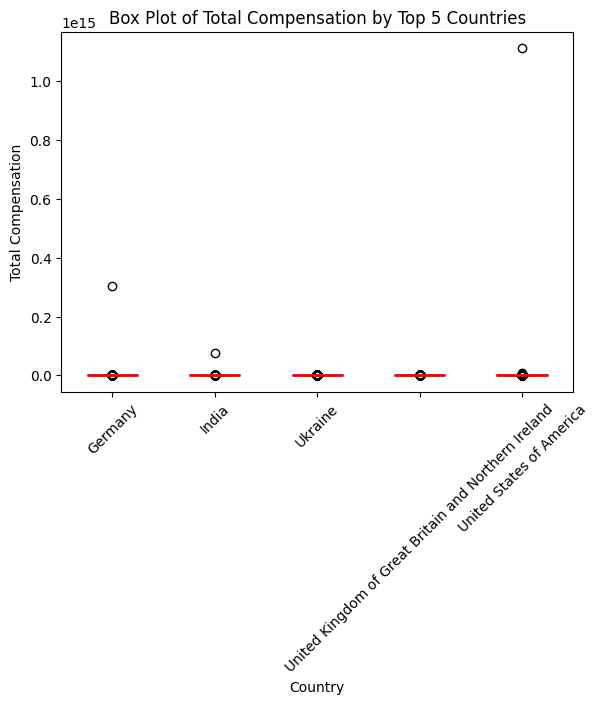

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ الاتصال بقاعدة البيانات
conn = sqlite3.connect('survey-data.sqlite')

# 2️⃣ جلب الأعمدة
df = pd.read_sql_query("SELECT CompTotal, Country FROM main", conn)

# 3️⃣ تنظيف العمود CompTotal
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# إزالة الصفوف التي تحتوي NaN
df_clean = df.dropna(subset=['CompTotal', 'Country'])

# 4️⃣ إيجاد أفضل 5 دول حسب عدد المستجيبين
top5_countries = df_clean['Country'].value_counts().head(5).index.tolist()

# فلترة البيانات لتشمل فقط هذه الدول الخمسة
df_top5 = df_clean[df_clean['Country'].isin(top5_countries)]

# 5️⃣ رسم Box Plot لكل دولة
plt.figure(figsize=(12,7))
df_top5.boxplot(column='CompTotal', by='Country', grid=False, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='black'),
                medianprops=dict(color='red', linewidth=2),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'))

plt.title('Box Plot of Total Compensation by Top 5 Countries')
plt.suptitle('')  # إزالة العنوان التلقائي
plt.xlabel('Country')
plt.ylabel('Total Compensation')
plt.xticks(rotation=45)
plt.show()

# 6️⃣ إغلاق الاتصال
conn.close()


### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

Copyright © IBM Corporation. All rights reserved.
